# UNLP Machine Learning - TP2
---------------------------------------
* **Autores:** 
    - Emiliano Bohorquez
    - Brayan A. Condori Luque
    - Milagros Onofri
* **Objetivo:** Este notebook analiza los datos de forma descriptiva y predictiva.
---------------------------------------

**Fecha de Creación:** 2024-12-14

**Fecha de Actualización:** 2024-12-14

In [22]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score, LeaveOneOut, KFold
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
# Definimos las rutas de los archivos
TEST_FINAL = "../stores/test_set_final.csv"
TRAIN_FINAL = "../stores/train_set_final.csv"

In [28]:
train_set = pd.read_csv(TRAIN_FINAL, sep=",")
train_set = train_set.drop(columns=["Unnamed: 0"])
train_set

,id,Dominio_x,Fex_c_x,Fex_dpto_x,Ingtot,Ingtotob,Mujer,Varon,anios_educ_head,des_head,...,Nindigentes,Fex_c_y,Depto,Fex_dpto_y,P5090_Alquilada,P5090_Otro,P5090_Propia,P5090_Tomada,hacinamiento,mayoria_infancia
0,00004a3f76ed8c33d84a5c70,RESTO URBANO,535.09,243.97,1076429.42,1076429.42,3,2,11.00,1.00,...,0,535.09,17,243.97,0,0,1,0,1.50,0.60
1,000088edf78cfaaf1791beba,RESTO URBANO,48.64,80.15,1032500.00,1032500.00,2,1,5.00,NaN,...,0,48.64,13,80.15,1,0,0,0,1.50,0.33
2,00009b13480f6770b6a4d1e9,MANIZALES,18.83,15.89,1800000.00,1800000.00,1,2,3.00,NaN,...,0,18.83,17,15.89,0,0,1,0,1.33,0.33
3,0000b1899fb63a7bf0b73ccf,RURAL,48.19,87.44,640000.00,640000.00,1,1,0.00,NaN,...,0,48.19,41,87.44,0,0,1,0,2.50,0.00
4,0000f3ec65ccacadfcc59f32,SANTA MARTA,11.18,10.07,1812492.00,1812492.00,2,1,3.00,NaN,...,0,11.18,47,10.07,0,0,1,0,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164955,fffdd1840d9683d328b17ac1,RESTO URBANO,143.53,191.47,1607500.00,1607500.00,1,1,8.00,NaN,...,0,143.53,5,191.47,0,0,1,0,2.50,0.00
164956,fffe6982a5a945d769ff5893,MEDELLIN,101.21,94.03,956119.67,956119.67,2,1,5.00,NaN,...,0,101.21,5,94.03,1,0,0,0,1.00,0.33
164957,fffeb473112bf14d6b9da295,RURAL,201.08,103.25,760000.00,760000.00,3,1,3.00,NaN,...,0,201.08,44,103.25,0,0,0,1,1.00,0.50
164958,ffff32451ed4afe313eb8e8d,IBAGUE,30.89,23.02,400000.00,0.00,2,1,5.00,NaN,...,0,30.89,73,23.02,1,0,0,0,1.50,0.33


In [29]:
# Cleaning adicional

train_set['Dominio'] = train_set['Dominio_x']
train_set = train_set.drop(columns=['Dominio_x', 'Dominio_y'])

train_set['Fex_c'] = train_set['Fex_c_x']
train_set = train_set.drop(columns=['Fex_c_x', 'Fex_c_y'])

train_set['Fex_dpto'] = train_set['Fex_dpto_x']
train_set = train_set.drop(columns=['Fex_dpto_x', 'Fex_dpto_y'])


In [30]:
# Replace 99 anios_educ_head con NaN
train_set['anios_educ_head'] = train_set['anios_educ_head'].replace(99, np.nan)


In [31]:
# nuevas variables logaritmicas

variables_log =[ 'Ingtot', 'Ingtotob', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'P5130']

for var in variables_log:
    train_set[var + "_log"] = np.log(train_set[var] + 1)
    



In [32]:
train_set.columns

Index(['id', 'Ingtot', 'Ingtotob', 'Mujer', 'Varon', 'anios_educ_head',
       'des_head', 'hs_work_head', 'ina_head', 'infancia', 'ing_capital',
       'oc_head', 'subsidio', 'Clase', 'P5000', 'P5010', 'P5100', 'P5130',
       'P5140', 'Nper', 'Npersug', 'Ingtotug', 'Ingtotugarr', 'Ingpcug', 'Li',
       'Lp', 'Pobre', 'Indigente', 'Npobres', 'Nindigentes', 'Depto',
       'P5090_Alquilada', 'P5090_Otro', 'P5090_Propia', 'P5090_Tomada',
       'hacinamiento', 'mayoria_infancia', 'Dominio', 'Fex_c', 'Fex_dpto',
       'Ingtot_log', 'Ingtotob_log', 'Ingtotug_log', 'Ingtotugarr_log',
       'Ingpcug_log', 'P5130_log'],
      dtype='object')

In [33]:
# La función summarize busca replicar el comando del mismo nombre que se utiliza en STATA.

def summarize(df, x, ponder):
    """
    Función que devuelve una tabla de estadísticas principales con ponderadores
    
    """
    mean_w = np.average(df[x], weights = df[ponder]) # Obtención de la media ponderada
    std_w = np.sqrt(
    np.average(
        (df[x] - np.average(df[x], weights=df[ponder]))**2,
        weights=df[ponder]
    ) * (len(df[x]) / (len(df[x]) - 1)) # Cálculo manual del desvío estandar ajustandolo por N-1 grados de libertad
)

    total_obs = df[ponder].sum() # Total de observaciones en función de la sumatoria de la columna del ponderador
    minimo = df[x].min() # El valor mínimo del conjunto de datos
    maximo = df[x].max() # El valor máximo del conjunto de datos
    return mean_w, std_w, total_obs, minimo, maximo

In [34]:
train_set["ponder"] = 1

In [35]:
train_set.dtypes


id                   object
Ingtot              float64
Ingtotob            float64
Mujer                 int64
Varon                 int64
anios_educ_head     float64
des_head            float64
hs_work_head        float64
ina_head            float64
infancia              int64
ing_capital           int64
oc_head             float64
subsidio            float64
Clase                 int64
P5000                 int64
P5010                 int64
P5100               float64
P5130               float64
P5140               float64
Nper                  int64
Npersug               int64
Ingtotug            float64
Ingtotugarr         float64
Ingpcug             float64
Li                  float64
Lp                  float64
Pobre                 int64
Indigente             int64
Npobres               int64
Nindigentes           int64
Depto                 int64
P5090_Alquilada       int64
P5090_Otro            int64
P5090_Propia          int64
P5090_Tomada          int64
hacinamiento        

In [36]:
numeric_columns = train_set.select_dtypes(include=[np.number]).columns
summary_stats = {col: summarize(train_set, col, "ponder") for col in numeric_columns}
summary_stats

{'Ingtot': (2102585.768979283,
  2532552.3920253343,
  164960,
  0.0,
  85833333.3333333),
 'Ingtotob': (1803343.1188095447,
  2349000.5674734935,
  164960,
  0.0,
  85833333.3333333),
 'Mujer': (1.7404037342386034, 1.1797312778577131, 164960, 0, 14),
 'Varon': (1.5519641125121242, 1.1231996727564872, 164960, 0, 14),
 'anios_educ_head': (nan, nan, 164960, 0.0, 15.0),
 'des_head': (nan, nan, 164960, 1.0, 1.0),
 'hs_work_head': (nan, nan, 164960, 1.0, 130.0),
 'ina_head': (nan, nan, 164960, 1.0, 1.0),
 'infancia': (0.8067349660523764, 1.046519254502298, 164960, 0, 14),
 'ing_capital': (0.12866755577109604, 0.3348326380445047, 164960, 0, 1),
 'oc_head': (nan, nan, 164960, 1.0, 1.0),
 'subsidio': (0.11609512708826797, 0.2183200830381728, 164960, 0.0, 1.0),
 'Clase': (1.0937924345295829, 0.2915406129621546, 164960, 1, 2),
 'P5000': (3.3903794859359846, 1.2394737894974657, 164960, 1, 98),
 'P5010': (1.989361057225994, 0.8981577199495397, 164960, 1, 15),
 'P5100': (nan, nan, 164960, 98.0, 280

Variable: Ingtot
Media: 2102585.77
Desvío Estándar: 2532552.39
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 85833333.33


Variable: Ingtotob
Media: 1803343.12
Desvío Estándar: 2349000.57
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 85833333.33


Variable: Ingtotug
Media: 2090895.10
Desvío Estándar: 2512487.78
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 85833333.33


Variable: Ingtotugarr
Media: 2307864.63
Desvío Estándar: 2628933.20
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 88833333.33


Variable: Ingpcug
Media: 870639.26
Desvío Estándar: 1244349.74
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 88833333.33


Variable: Mujer
Media: 1.74
Desvío Estándar: 1.18
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 14.00


Variable: Varon
Media: 1.55
Desvío Estándar: 1.12
Total de Observaciones: 164960
Mínimo: 0.00
Máximo: 14.00


Variable: anios_educ_head
Media: 6.10
Desvío Estándar: 3.58
Total de Observaciones: 164939
Mínimo: 0.00
Máximo: 15.00


Variab

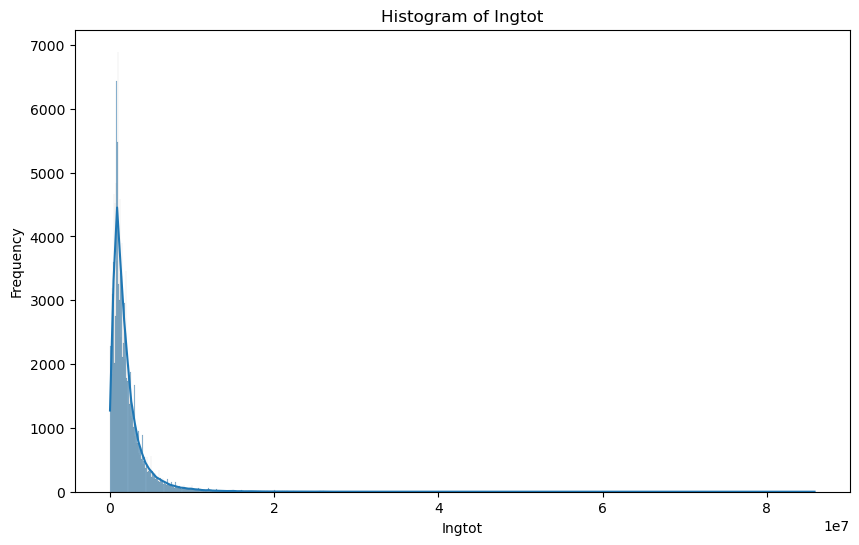

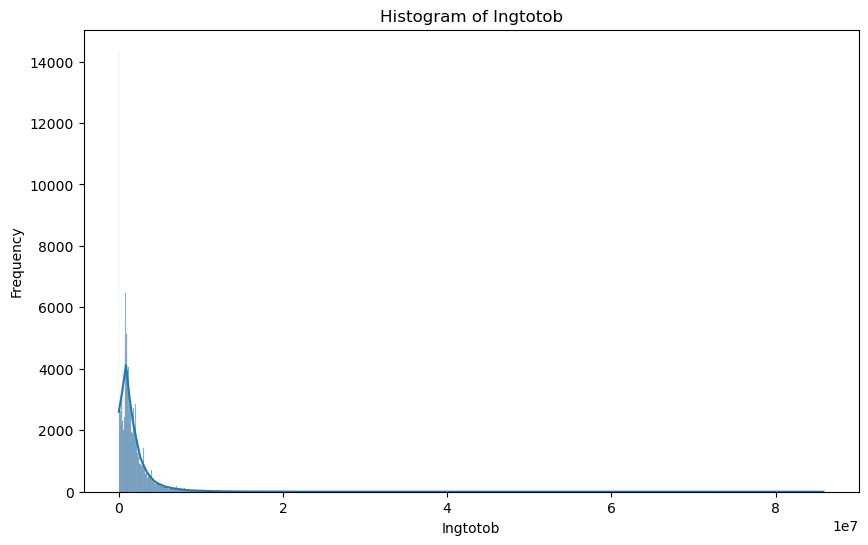

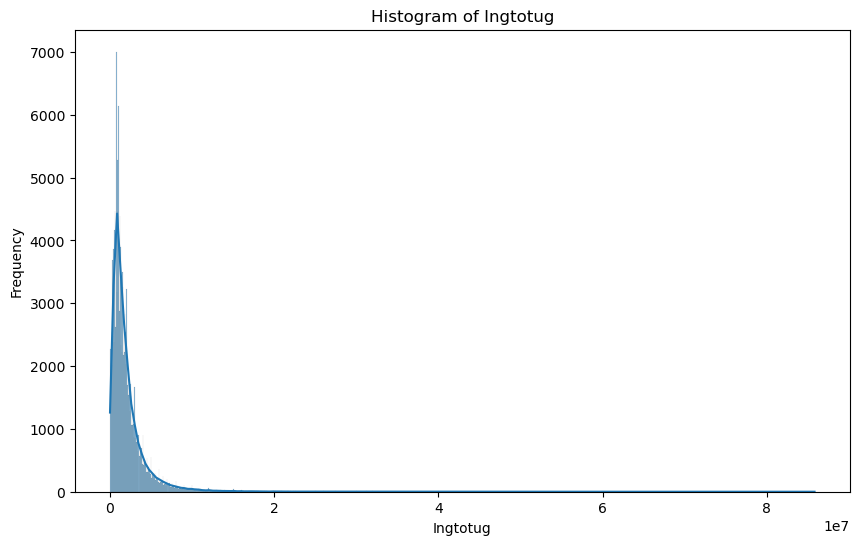

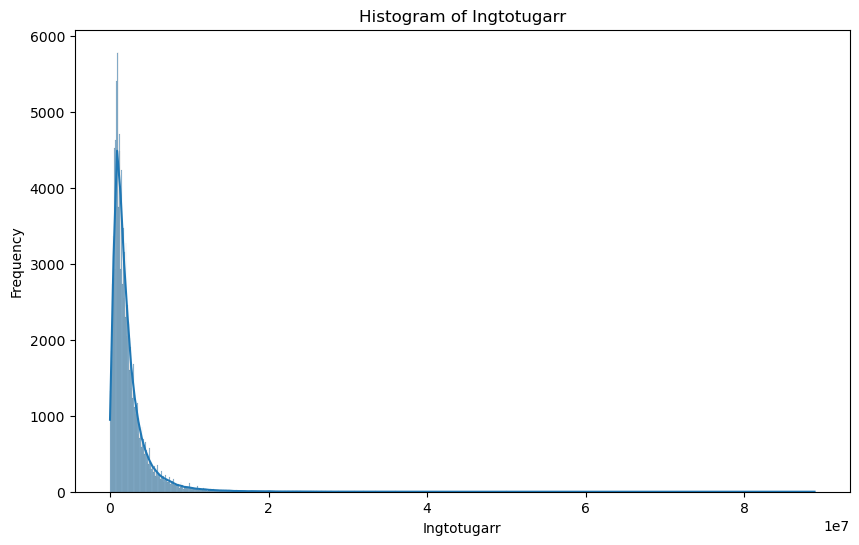

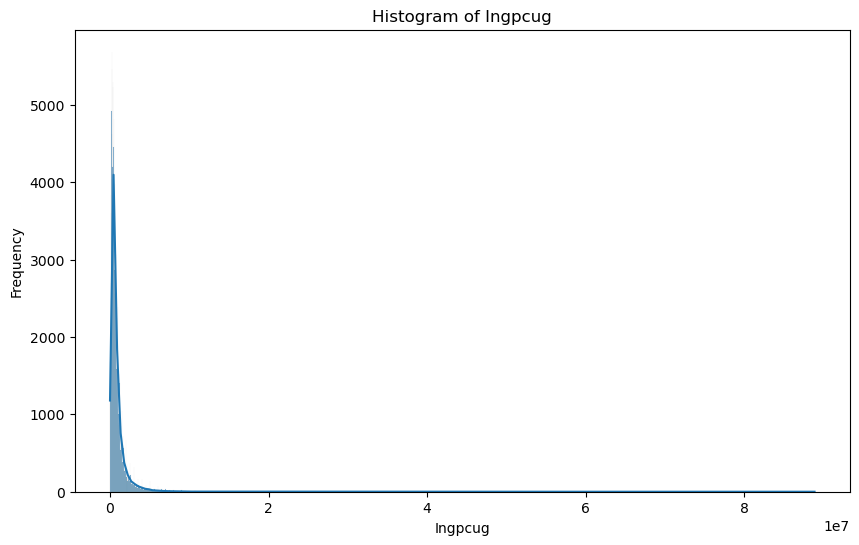

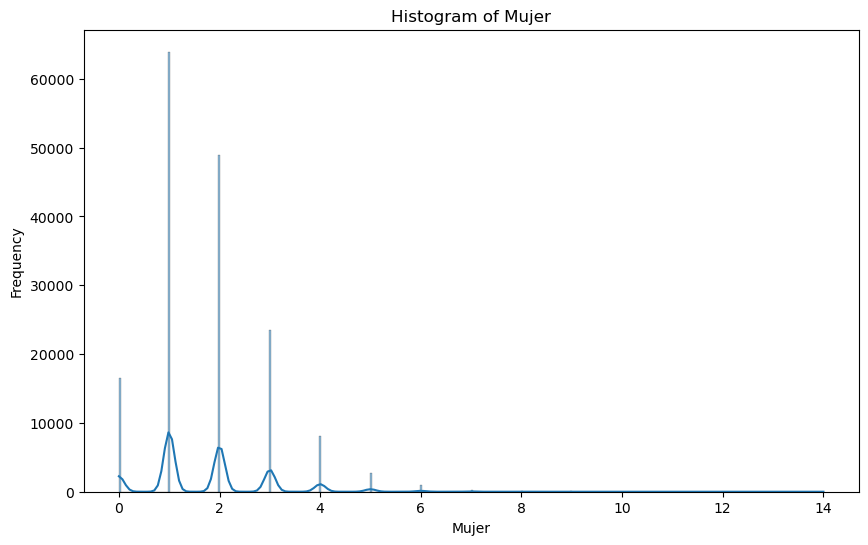

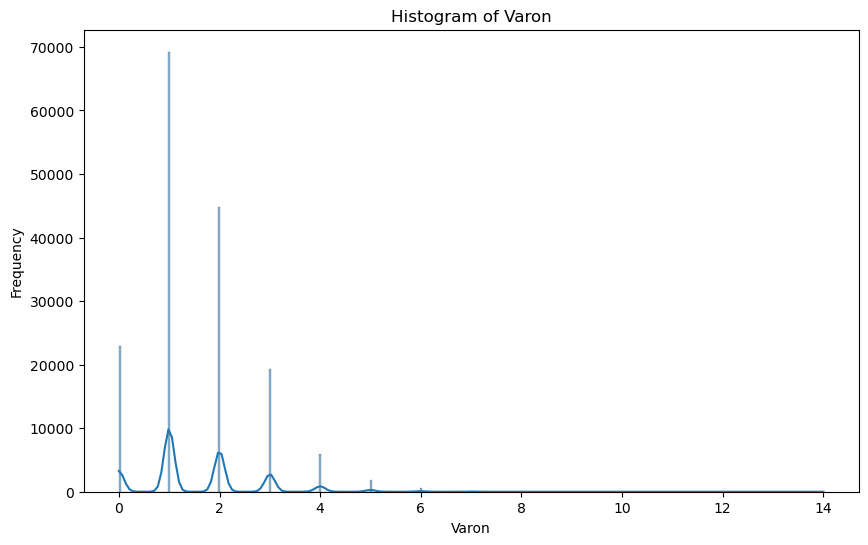

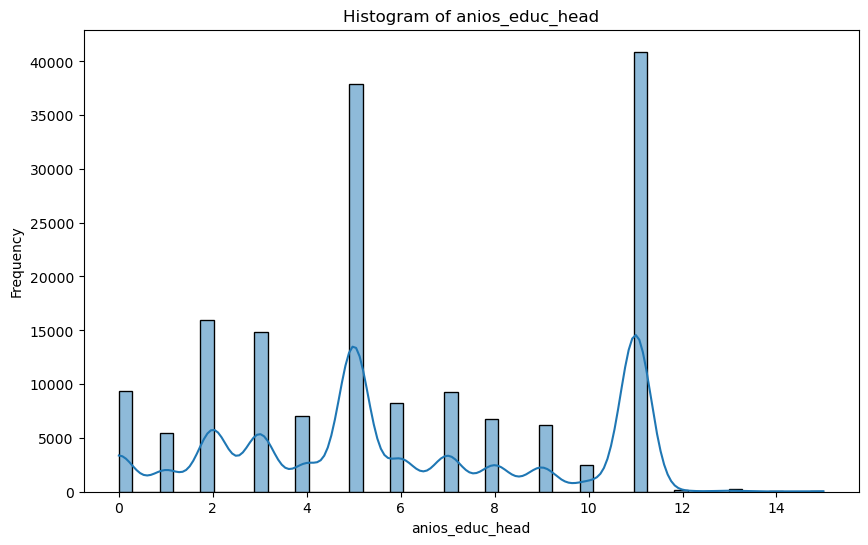

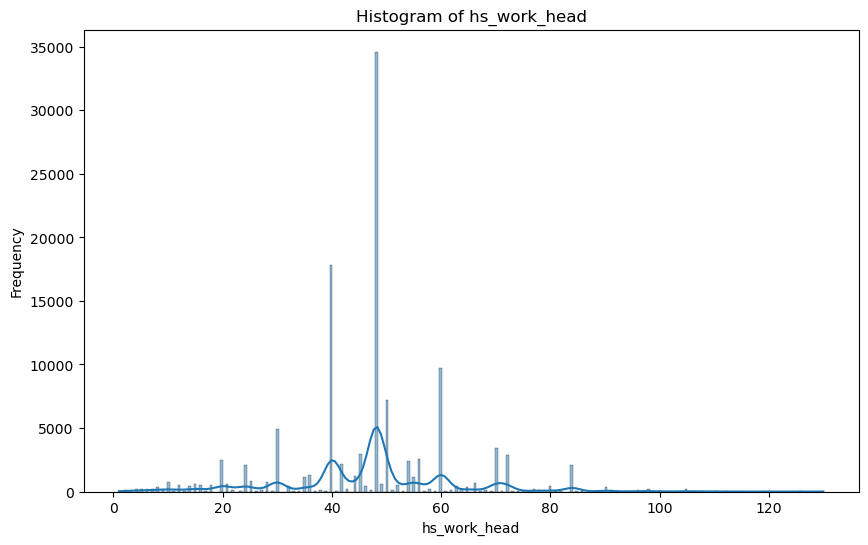

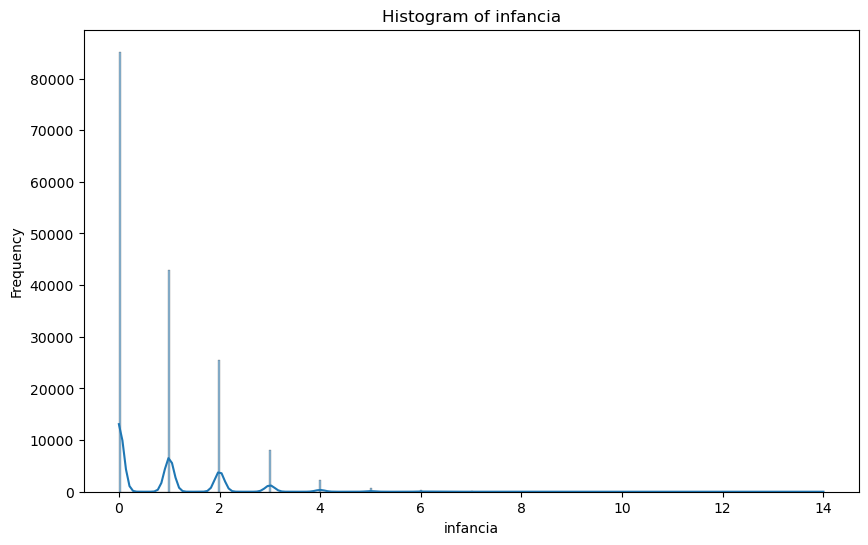

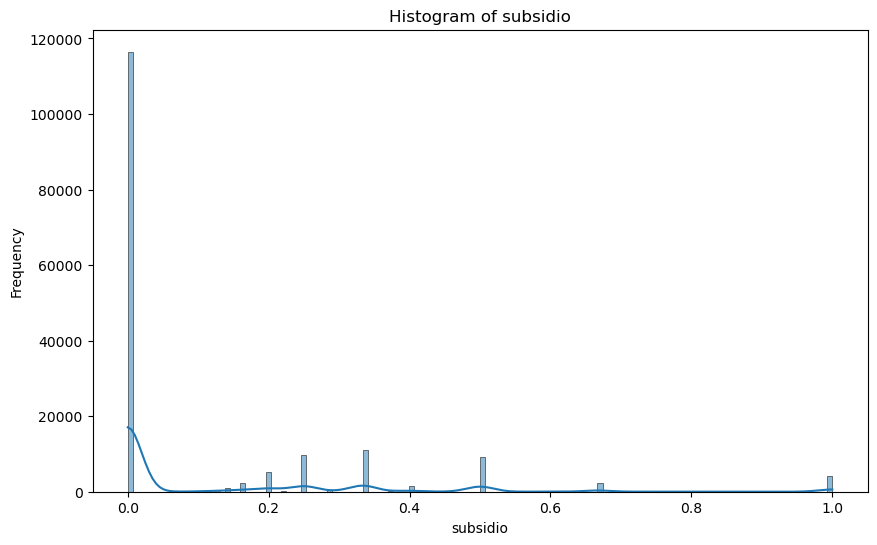

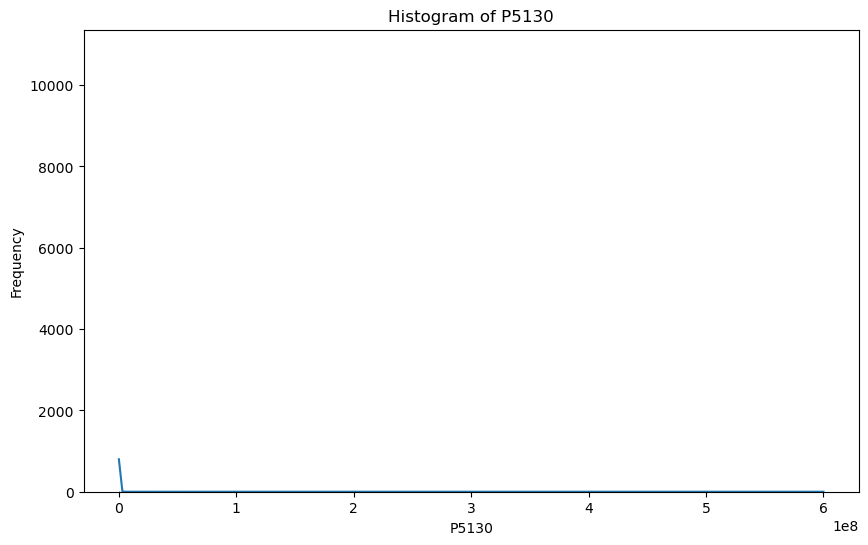

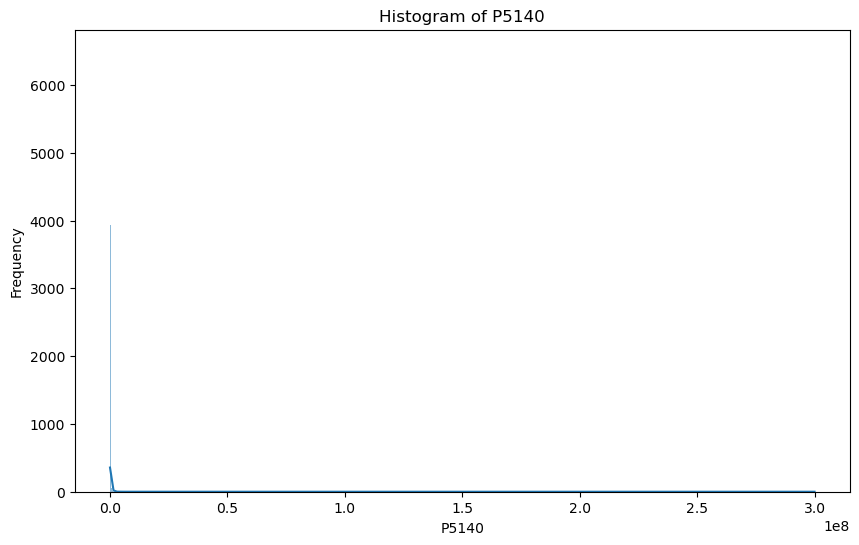

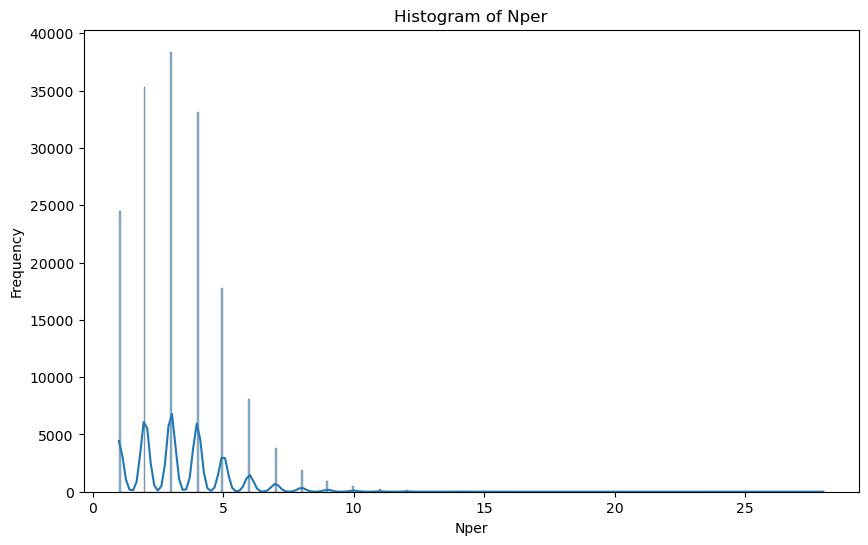

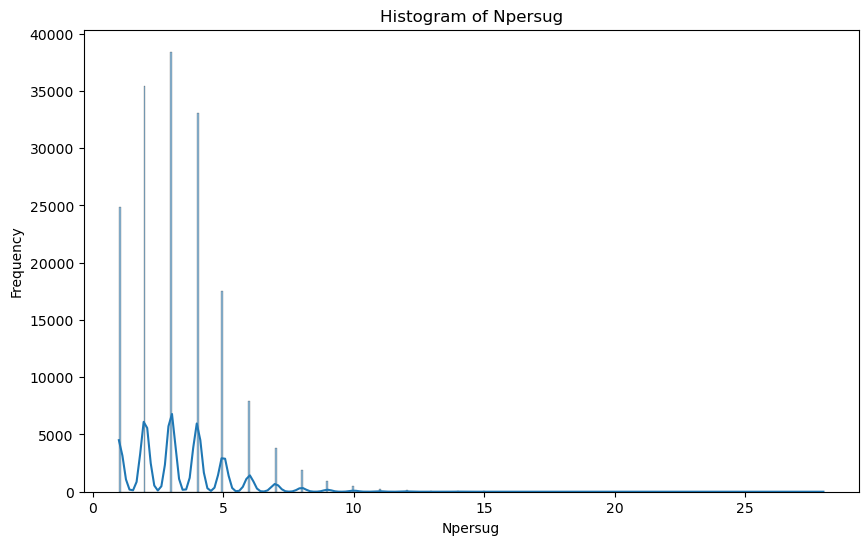

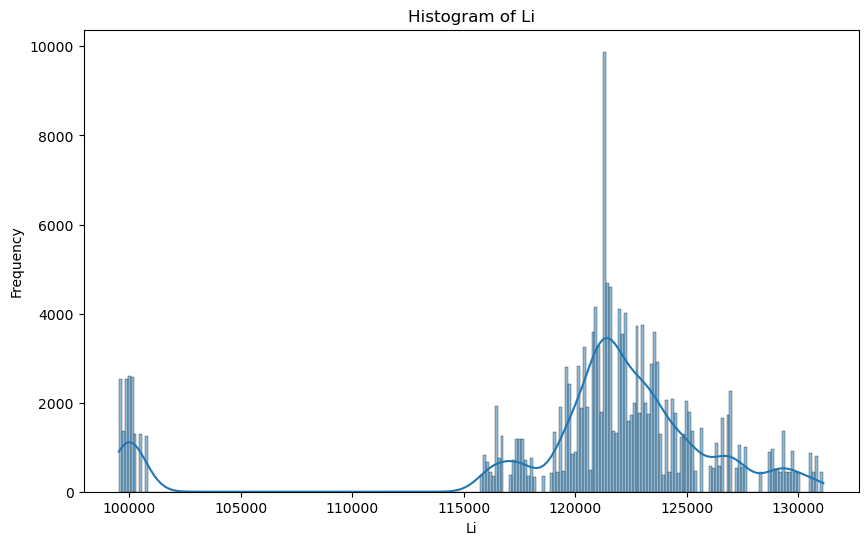

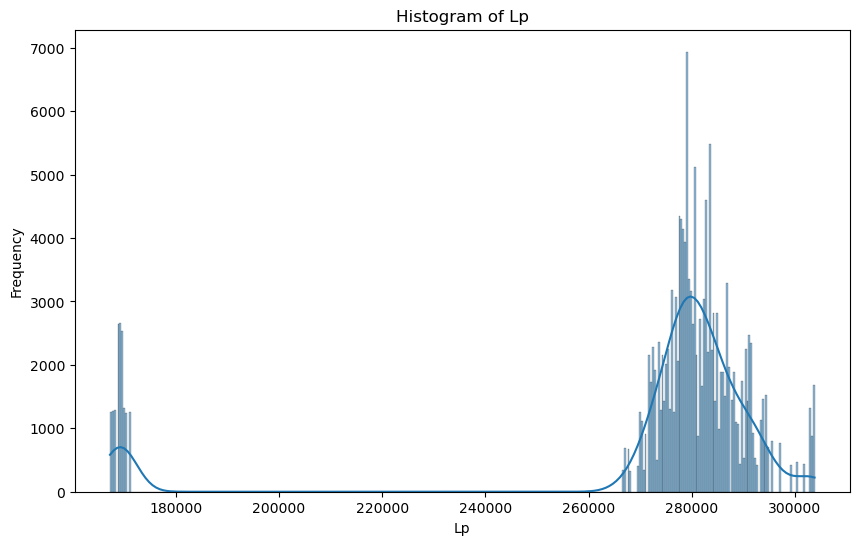

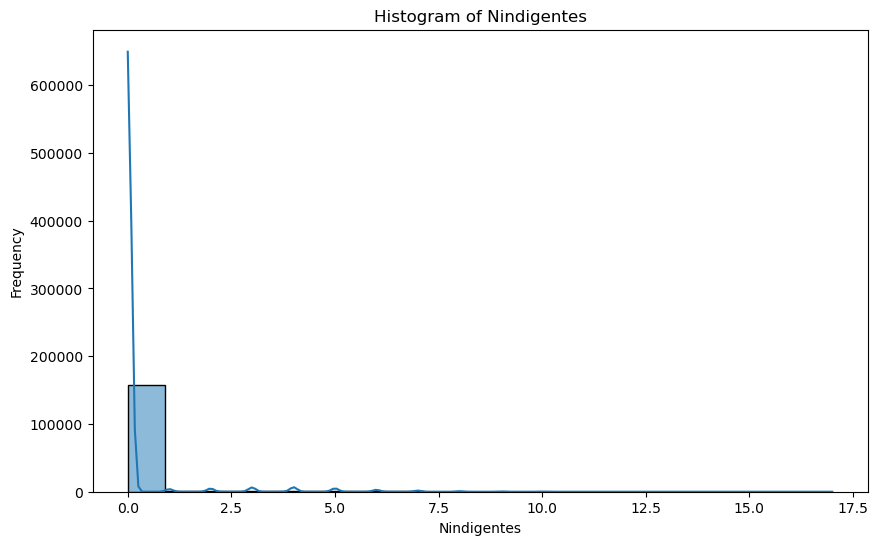

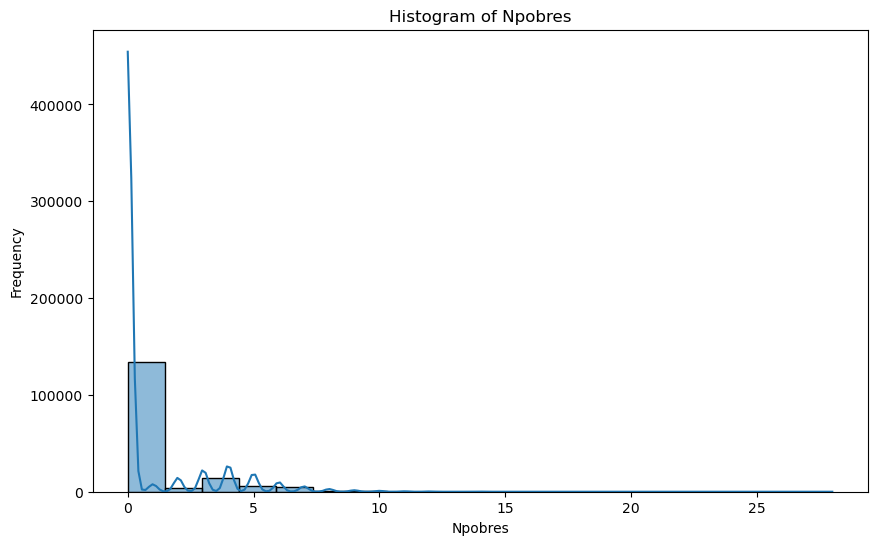

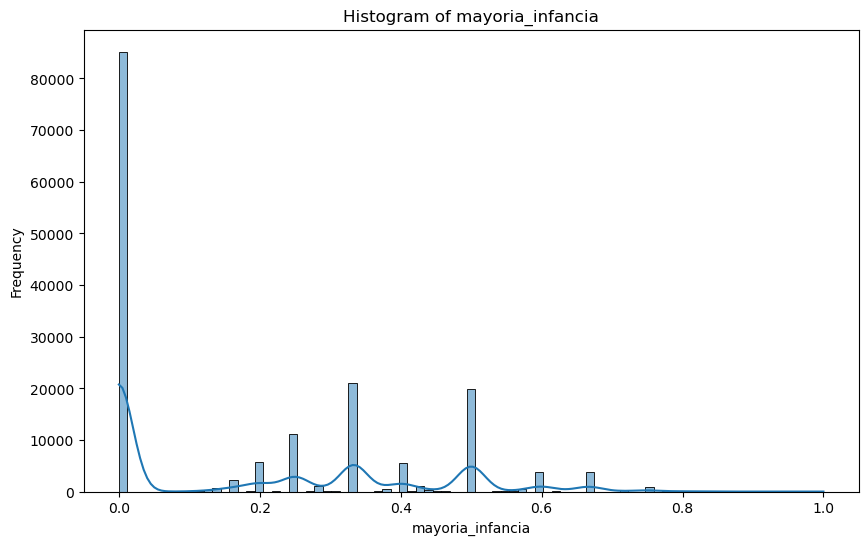

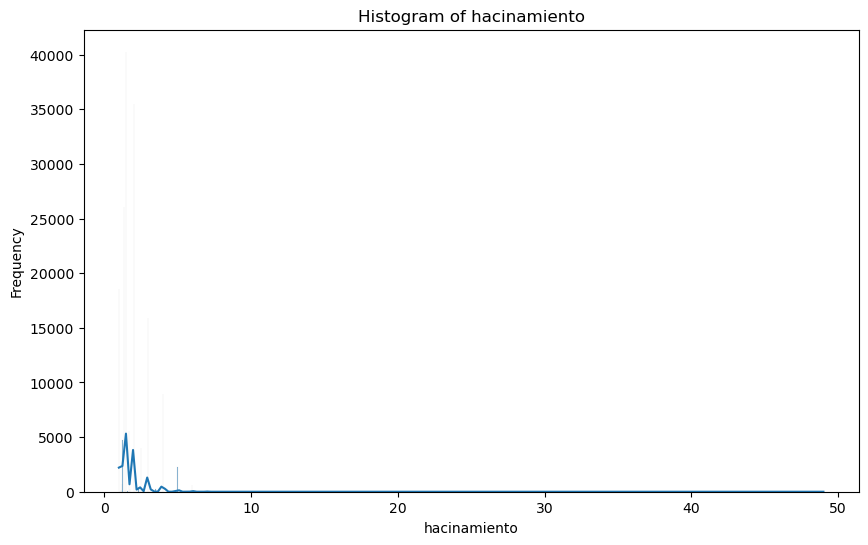

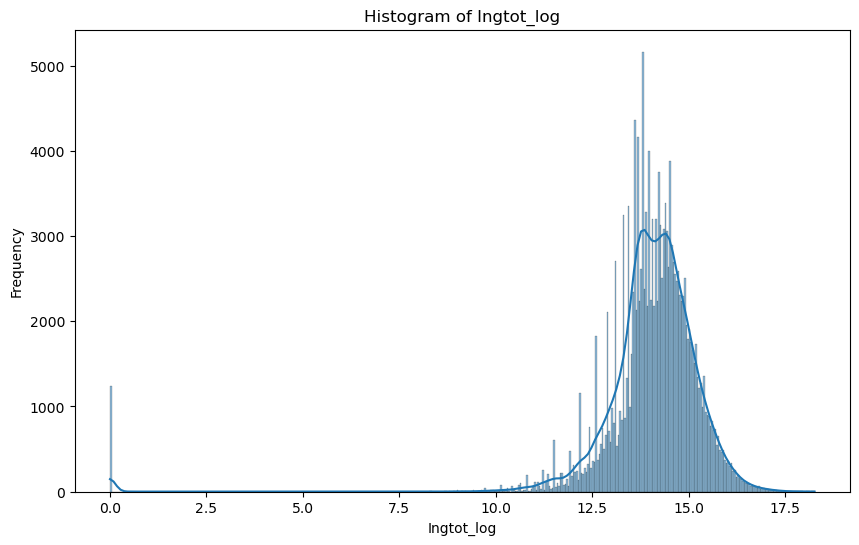

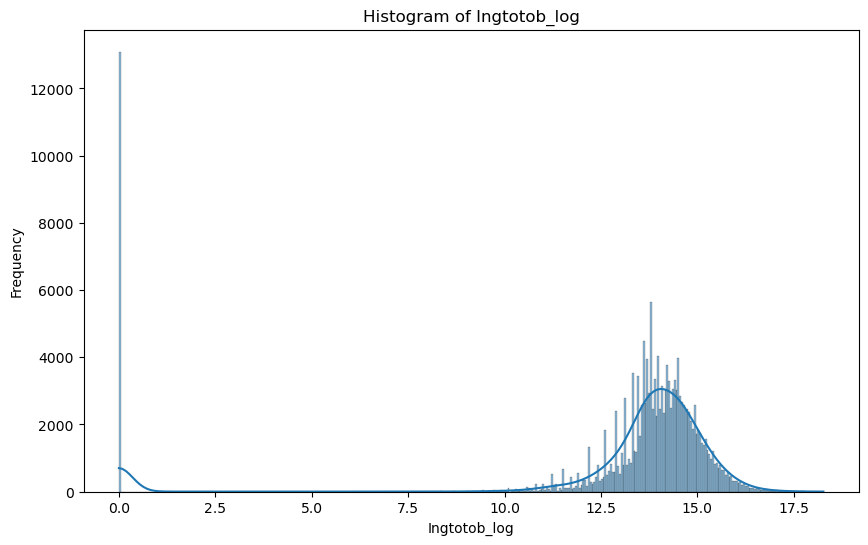

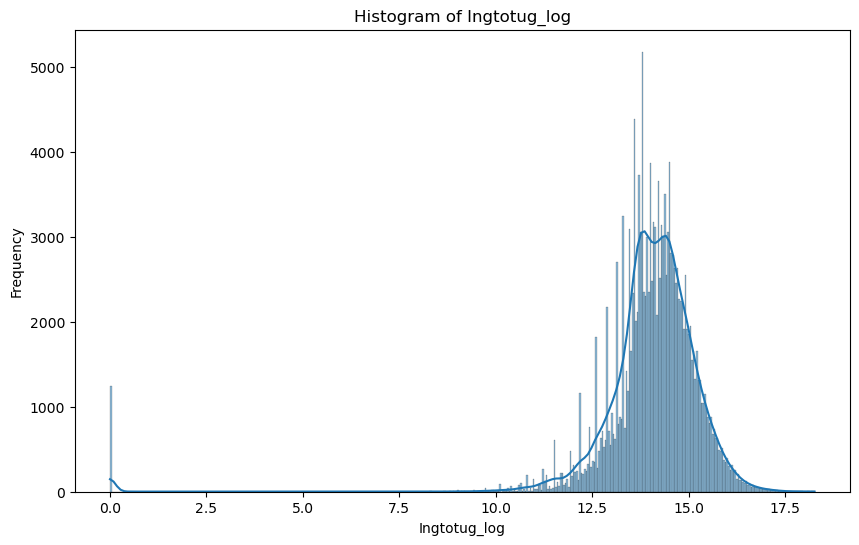

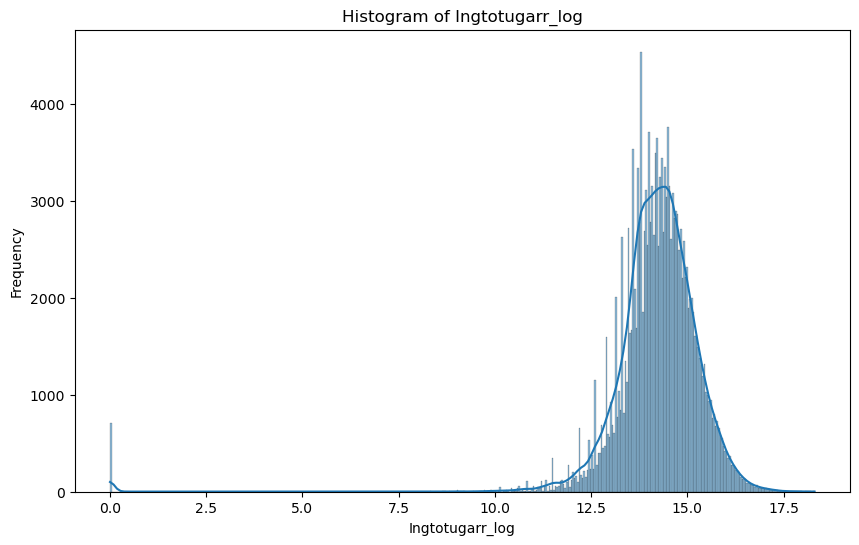

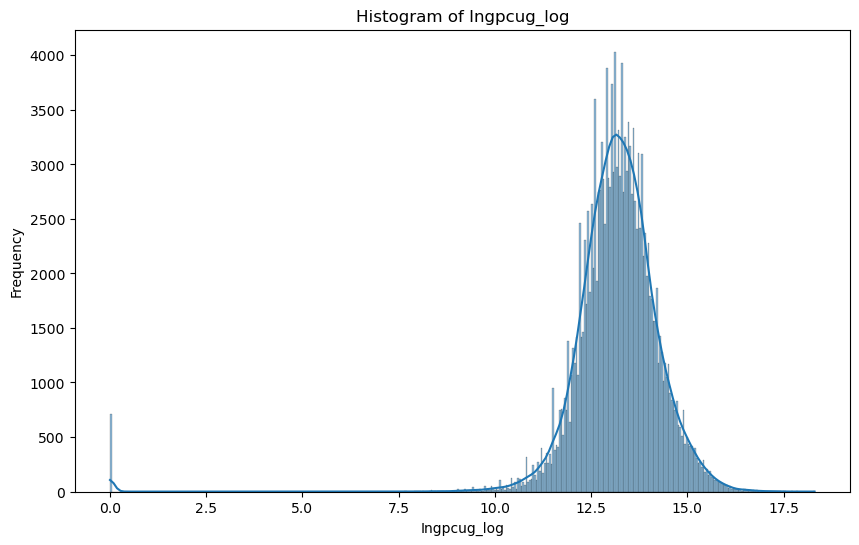

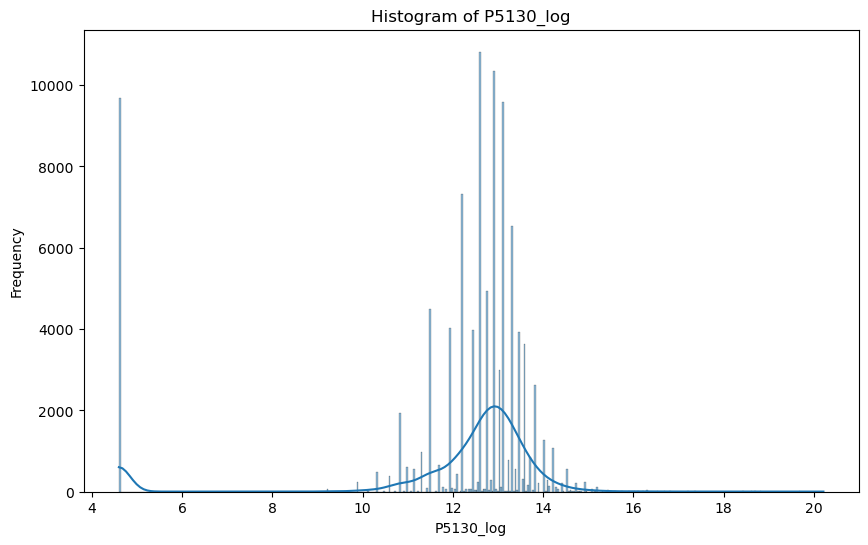

In [41]:
continuas = [
    'Ingtot', 'Ingtotob', 'Ingtotug', 'Ingtotugarr', 'Ingpcug',
      'Mujer', 'Varon', 'anios_educ_head', 'hs_work_head', 'infancia',
        'subsidio', 'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Nindigentes',
          'Npobres', 'mayoria_infancia', 'hacinamiento', 'Ingtot_log', 'Ingtotob_log', 'Ingtotug_log', 'Ingtotugarr_log',
       'Ingpcug_log', 'P5130_log']

for var in continuas:
    if var in train_set.columns:  # Ensure the variable exists in the DataFrame
        filtered_data = train_set[var].dropna()  # Drop NaN values for this variable
        if not filtered_data.empty:  # Check if there are remaining observations
            print(f"Variable: {var}")
            print(f"Media: {filtered_data.mean():.2f}")  # Calculate mean
            print(f"Desvío Estándar: {filtered_data.std():.2f}")  # Calculate standard deviation
            print(f"Total de Observaciones: {filtered_data.shape[0]}")  # Count non-NaN observations
            print(f"Mínimo: {filtered_data.min():.2f}")  # Calculate minimum
            print(f"Máximo: {filtered_data.max():.2f}")  # Calculate maximum
            print("\n")
        else:
            print(f"Variable: {var} has no valid observations.\n")

# Create histograms for continuous variables

for var in continuas:
    if var in train_set.columns:
        filtered_data = train_set[var].dropna()
        if not filtered_data.empty:
            plt.figure(figsize=(10, 6))
            sns.histplot(filtered_data, kde=True)
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel("Frequency")
            plt.show()
            

In [38]:
# Subset of the dataset with dummy variables
dummies = [
    'des_head', 'ina_head', 'ing_capital', 'oc_head',
    'Pobre', 'Indigente', 
    'P5090_Alquilada', 'P5090_Otro', 'P5090_Propia', 'P5090_Tomada'
]


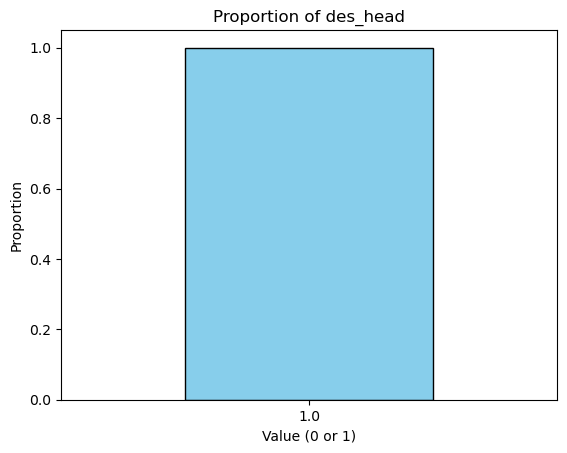

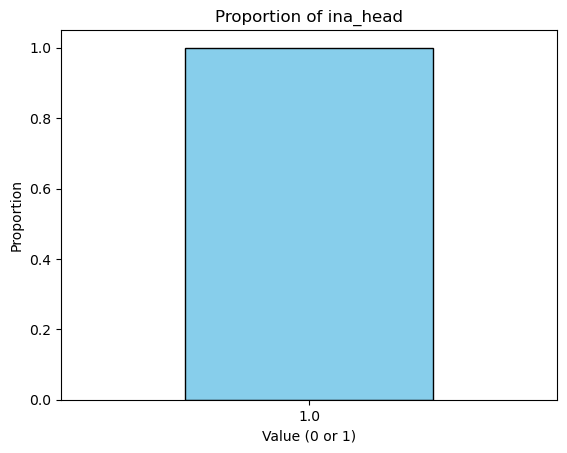

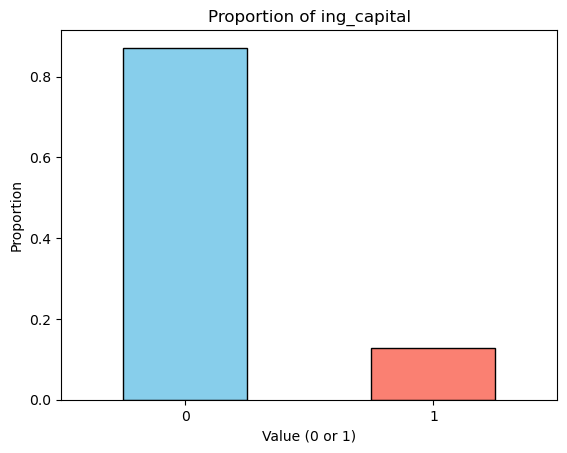

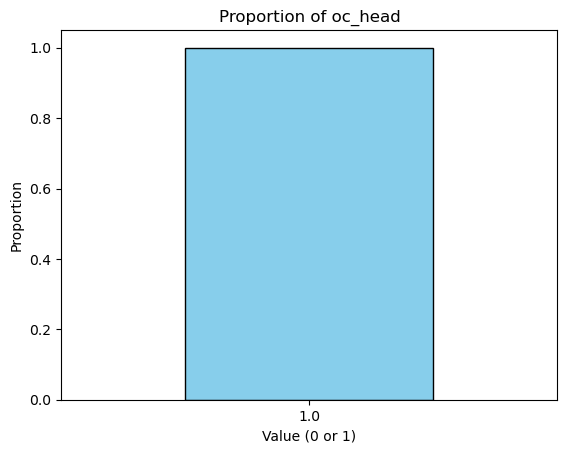

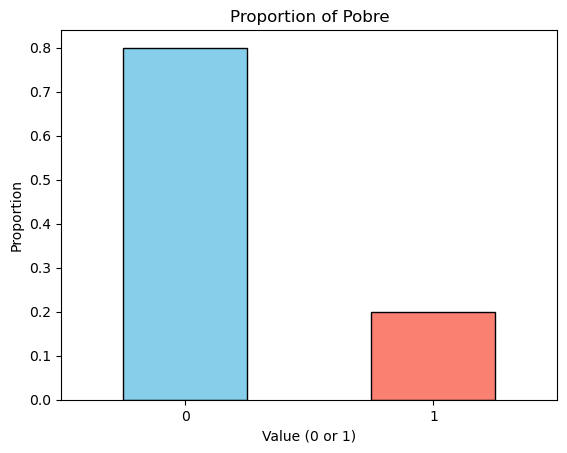

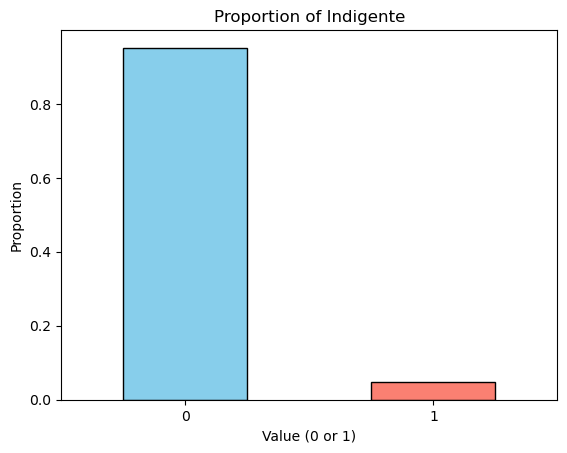

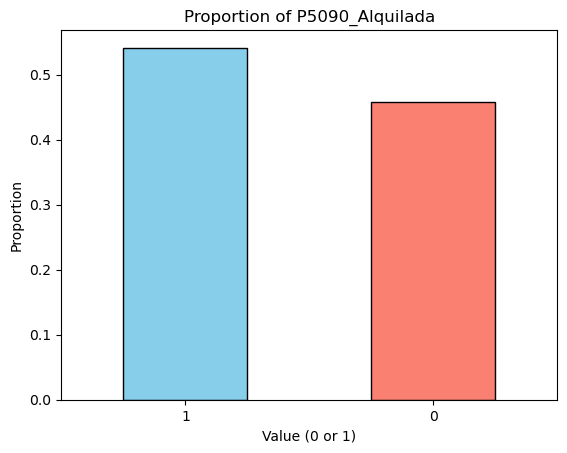

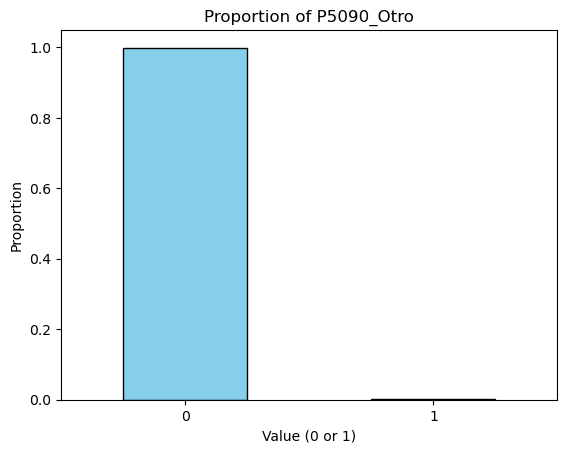

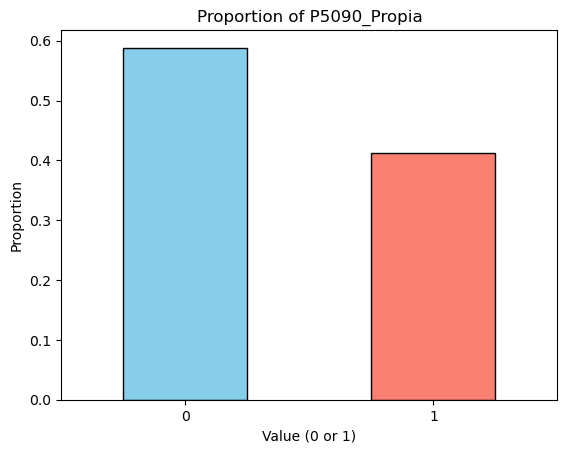

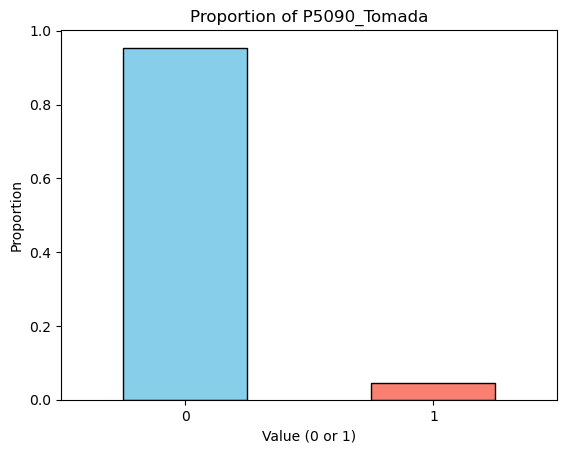

In [39]:
for var in dummies:
    if var in train_set.columns:
        proportions = train_set[var].value_counts(normalize=True)
        proportions.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
        plt.title(f"Proportion of {var}")
        plt.xlabel("Value (0 or 1)")
        plt.ylabel("Proportion")
        plt.xticks(rotation=0)
        plt.show()


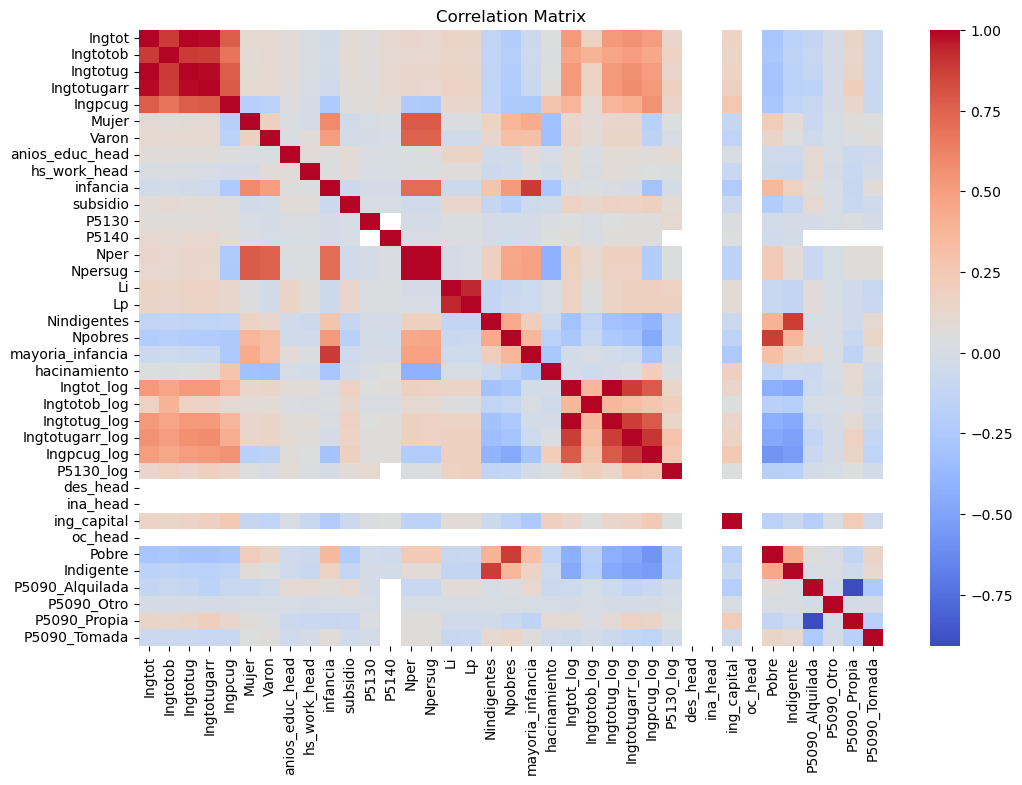

In [44]:
#  matriz de correlación

variables_matriz = continuas + dummies  
subset = train_set[variables_matriz]

corr = subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
